# **Diabetes Predictor**

*My goal is to analyze the diabetes dataset using machine learning models to predict the presence or absence of diabetes based on diagnostic measurements. I will preprocess the dataset by applying StandardScaler, then split it into training and test sets. Next, I will apply various classification algorithms to both preprocessed datasets. Finally, I will evaluate the performance of these algorithms and visualize the results.*

In [1]:
#Importing Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# For ignoring Warnings while running Python codes.

import warnings 
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

## Loading the DataSet

In [3]:
df = pd.read_csv('diabetes_dataset.csv')

In [4]:
df.sample(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
215,151,70,40,271,41.8,0.742,38,1
46,146,56,0,0,29.7,0.564,29,0
507,130,60,23,170,28.6,0.692,21,0
246,122,68,0,0,31.2,0.258,41,0
554,84,64,23,115,36.9,0.471,28,0


## Understanding the Data

In [5]:
df.shape

(768, 8)

>*There are 768 rows and 8 columns in the dataset.*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
#Checking for NULL Values

df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

>*There are no NULL values in the data*

## **Exploratory Data Analysis**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


***Here, note that some features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have zero values, which is absurd. So, we treat these zeros as NaN values.***

In [9]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df.isnull().sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


***Imputing these NaN values using suitable statistical measures of Central Tendency***

In [10]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace =True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

### **Checking for duplicacy in dataset**

In [11]:
df.duplicated().sum()

0

>*There are 0 duplicated rows in the dataset.*

### **MultiVariate Analysis**

In [12]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


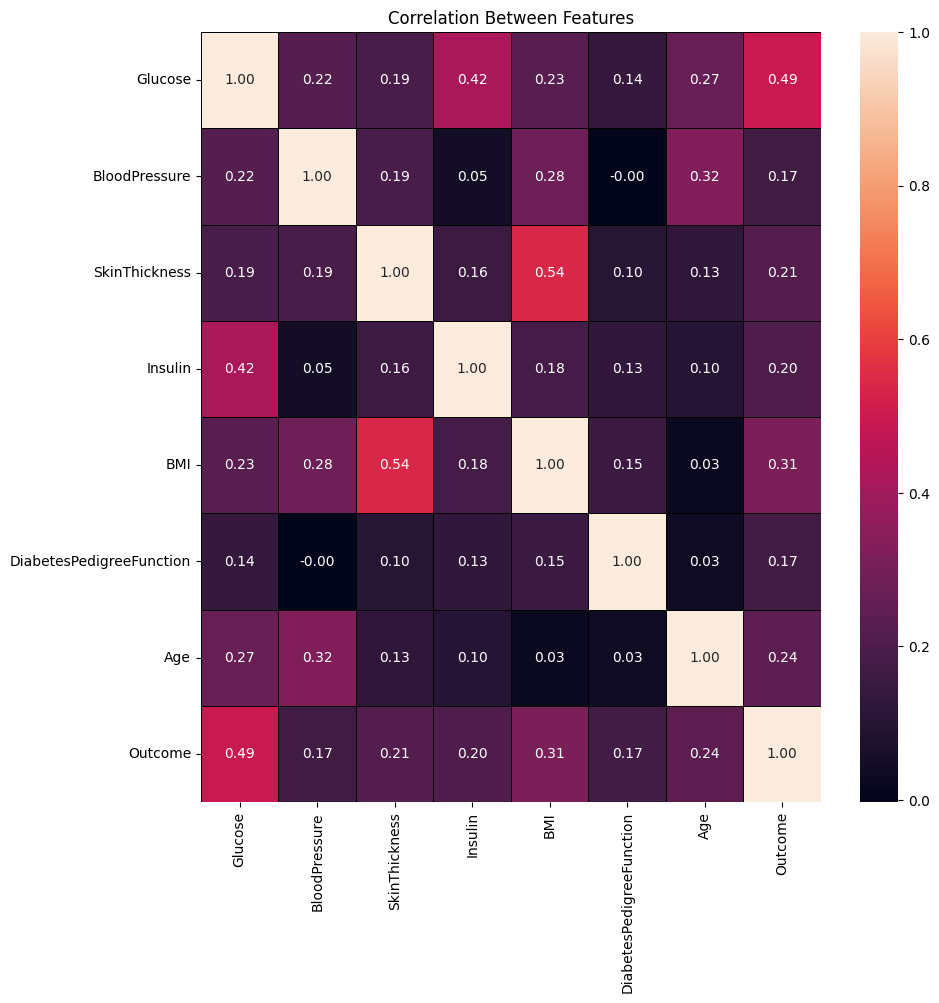

In [13]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), linewidths = 0.5,annot = True, fmt = ".2f", linecolor = "black", ax = ax)
plt.title("Correlation Between Features")
plt.show();

>No significant correlation between features.

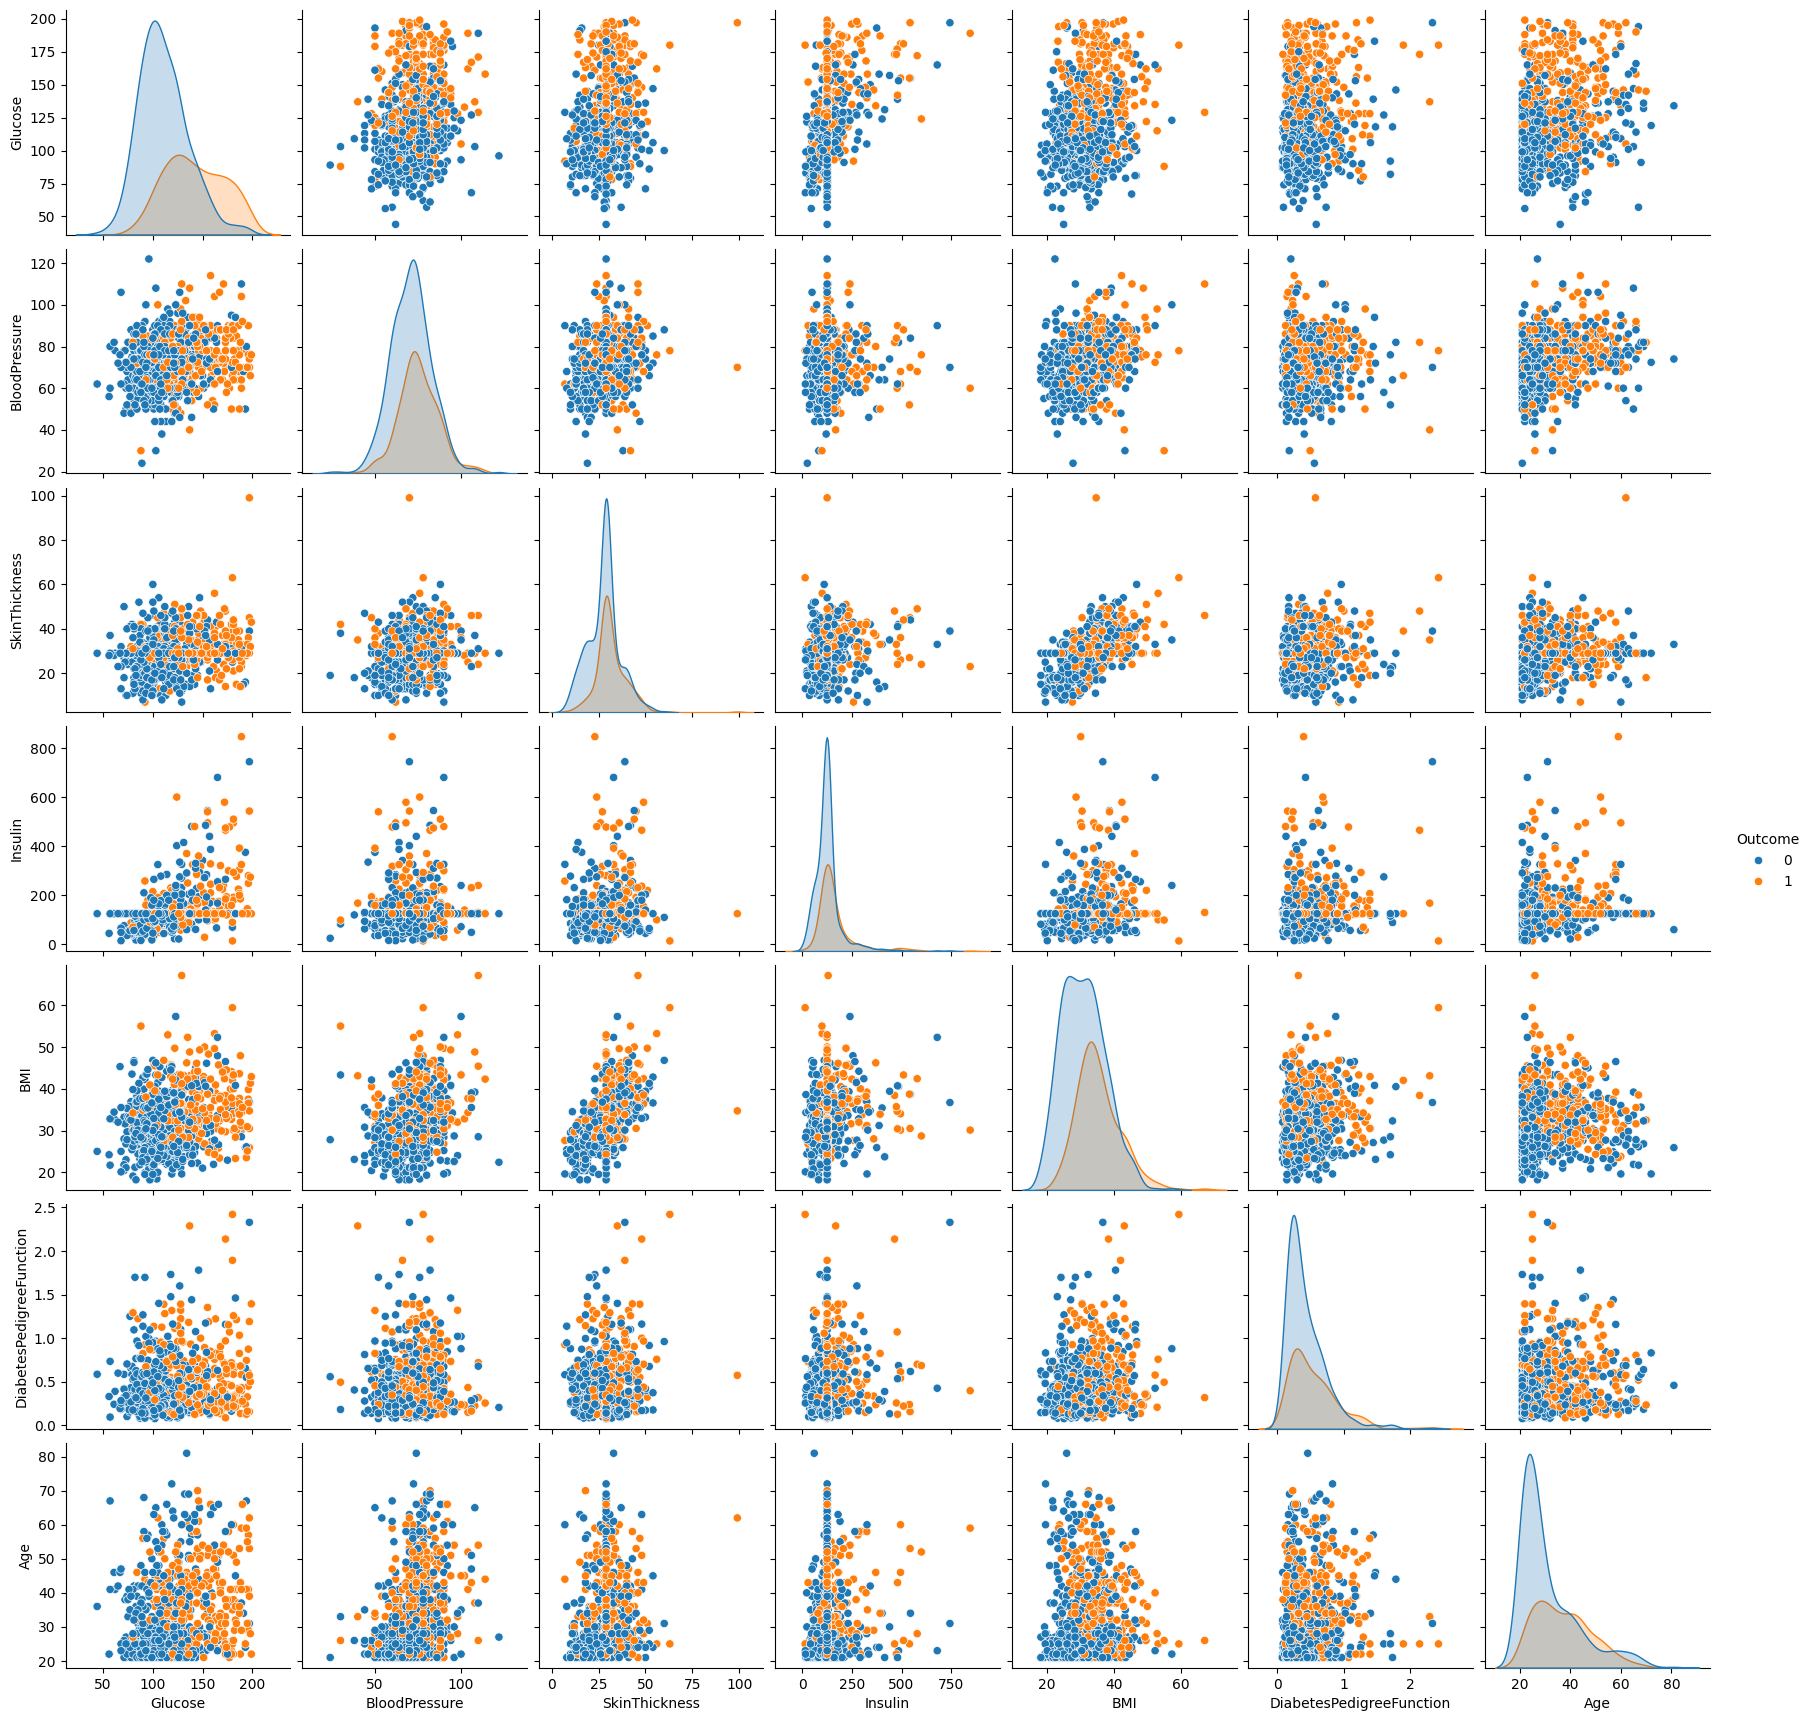

In [14]:
sns.pairplot(df, hue = "Outcome")
plt.show();

Outcome
0    500
1    268
Name: count, dtype: int64


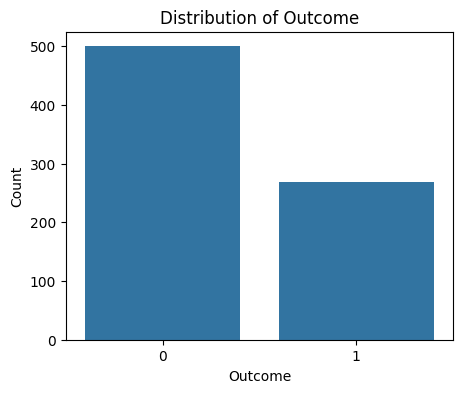

In [15]:
print(df.Outcome.value_counts())
plt.figure(figsize=(5,4))
sns.barplot(x=df.Outcome.value_counts().index, y=df.Outcome.value_counts())
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()

### **Plotting BoxPlots (For detecting Outliers)**

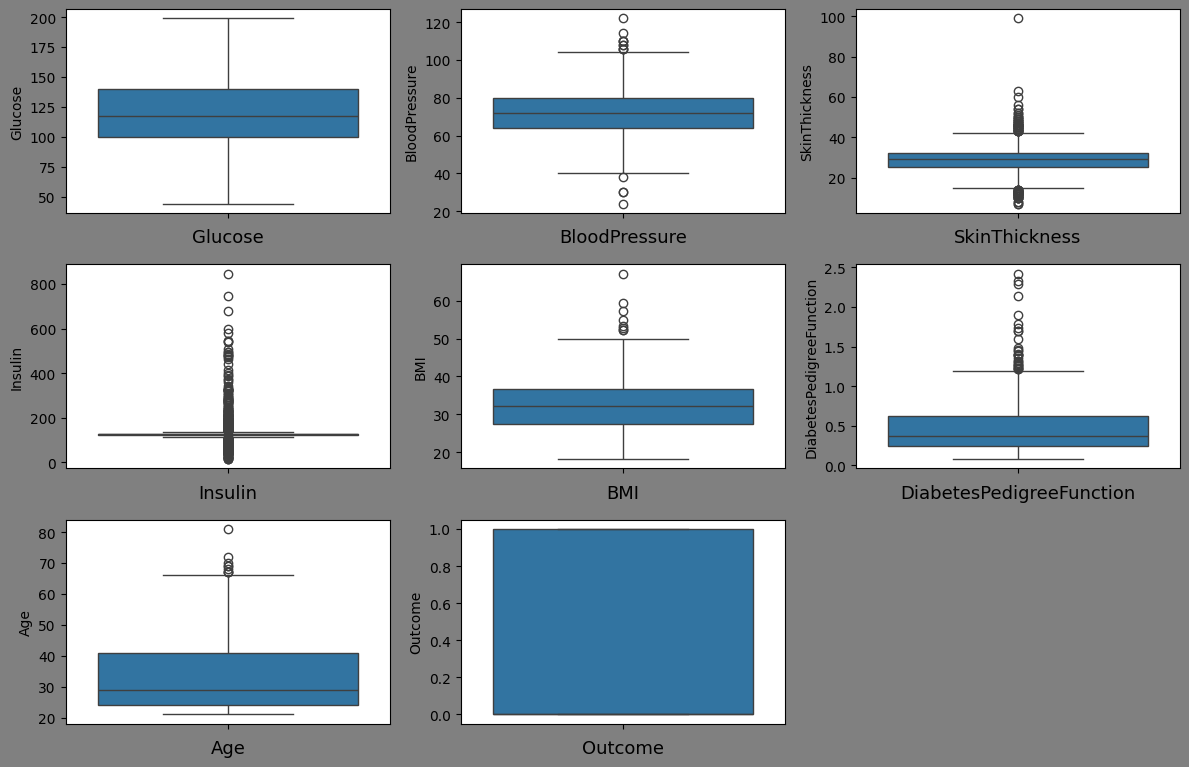

In [16]:
plt.figure(figsize = (12,10), facecolor = 'grey')
plot_no = 1
for i in df.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize=13)
    plot_no +=1
plt.tight_layout()
plt.show()

>There are Outliers in BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

## Handling Outliers
Here, we used Inter-quartile Range based Capping method for tackling outliers.

In [17]:
#For doing IQR based filtering
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    capped_df = dataframe.copy()
    for i in outliers:
        q1 = capped_df[i].quantile(0.25)
        q3 = capped_df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q3 - 1.5 *iqr
        capped_df.loc[capped_df[i] >upper_limit, i] = upper_limit
        capped_df.loc[capped_df[i] <lower_limit, i] = lower_limit
    return capped_df

In [18]:
outliers_col=['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

df = outlier_capping(dataframe = df, outliers=outliers_col)

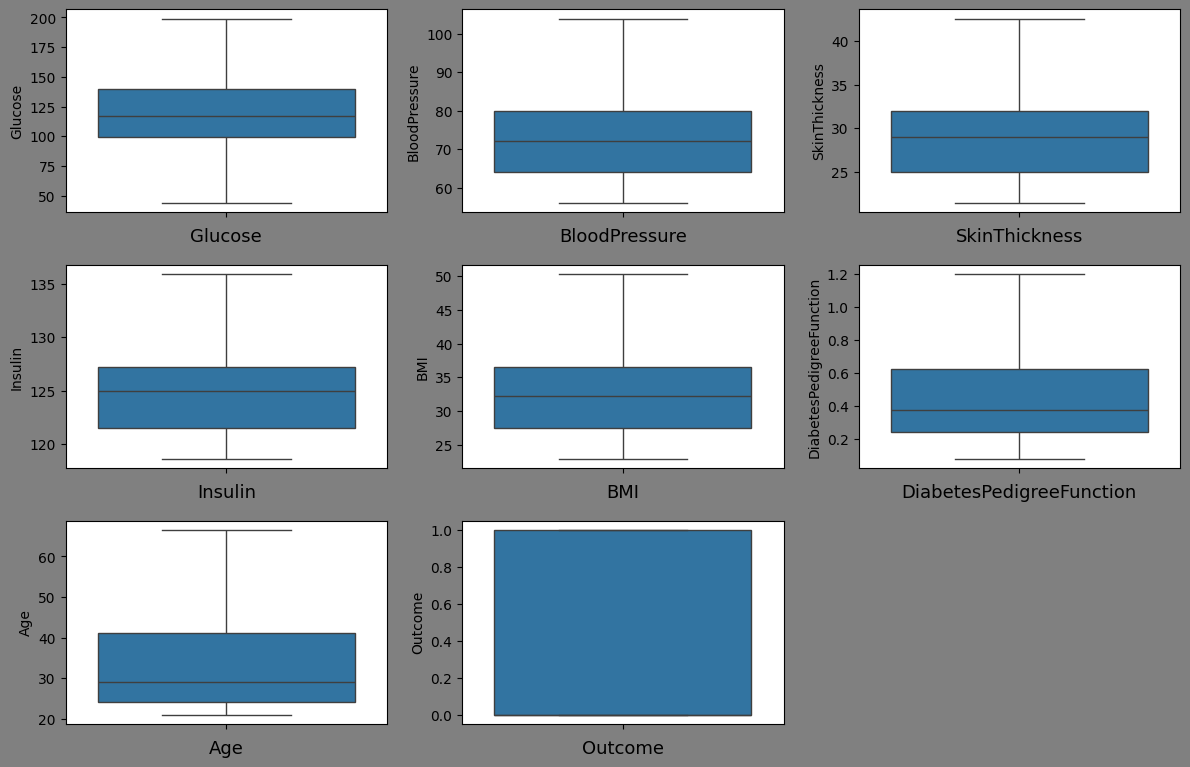

In [19]:
plt.figure(figsize = (12,10), facecolor = 'grey')
plot_no = 1
for i in df.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize = 13)
    plot_no +=1
plt.tight_layout()
plt.show()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.000
BloodPressure,768.0,72.811434,10.879635,56.000,64.00000,72.202592,80.00000,104.000
SkinThickness,768.0,29.647135,6.235897,21.500,25.00000,29.000000,32.00000,42.500
Insulin,768.0,126.033529,6.072769,118.625,121.50000,125.000000,127.25000,135.875
BMI,768.0,32.517839,6.459613,22.950,27.50000,32.300000,36.60000,50.250
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.372500,0.62625,1.200
Age,768.0,33.199870,11.628404,21.000,24.00000,29.000000,41.00000,66.500
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.000


### **Analyzing the Distribution of Data**

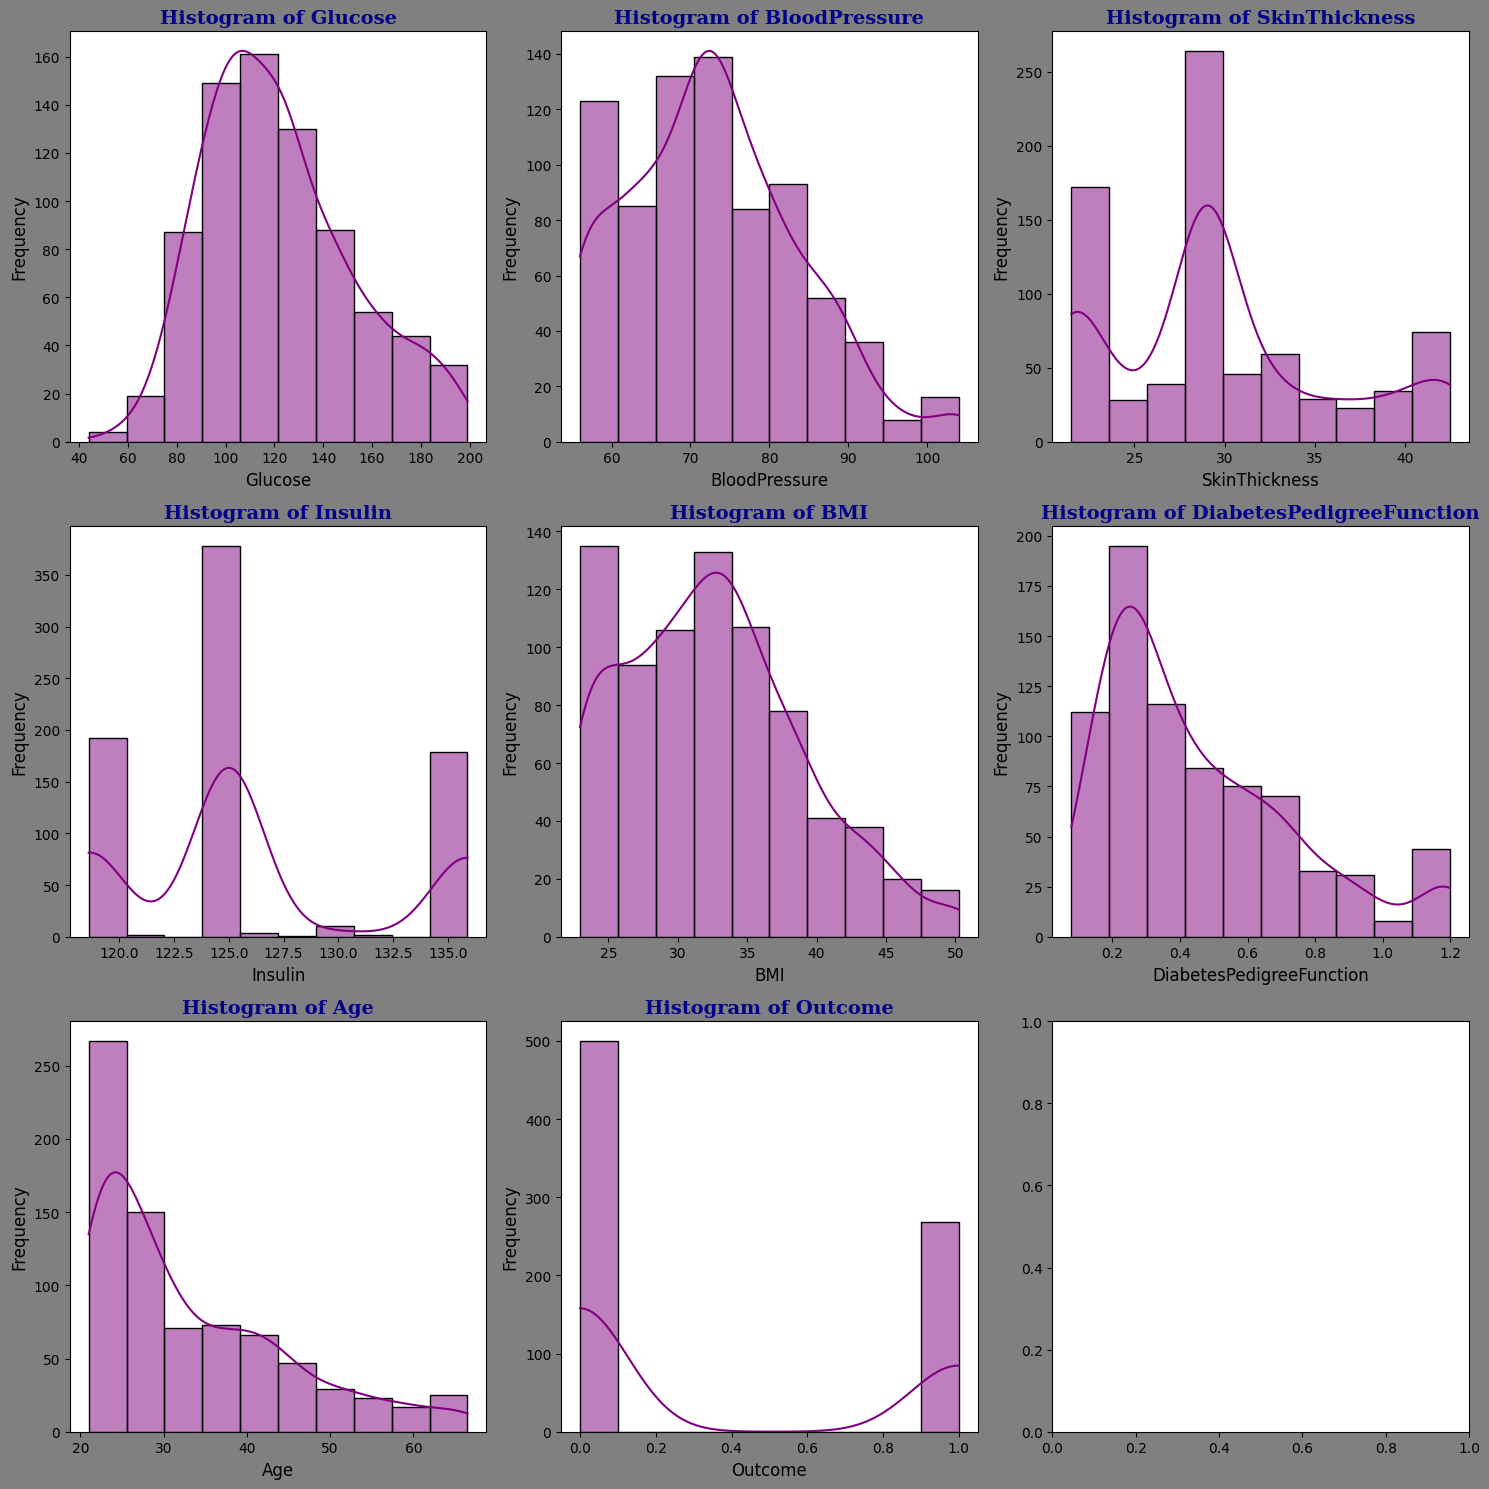

In [21]:
# Calculate the number of rows and columns for subplots
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate number of rows needed

# Create a figure and axis for subplots
fig, axs = plt.subplots(num_rows, 3, facecolor='grey', figsize=(15, num_rows * 5))

# Flatten the axis array to handle both 1D and 2D cases
axs = axs.flatten() if num_rows > 1 else [axs]

# Define custom font properties for the title
title_font = {'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 14}

# Iterate over each column in the DataFrame
for i, column in enumerate(df.columns):
    # Select the current axis for plotting
    ax = axs[i]
    
    # Plot histogram for the current column
    sns.histplot(df[column], bins=10, color='purple', edgecolor='black', kde=True, ax=ax)
    
    # Set labels and title for the plot
    ax.set_xlabel(column, fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)
    ax.set_title('Histogram of {}'.format(column), fontdict=title_font)

# Adjust layout and display the plot
plt.tight_layout()
plt.show();

#### **Q-Q Plots**

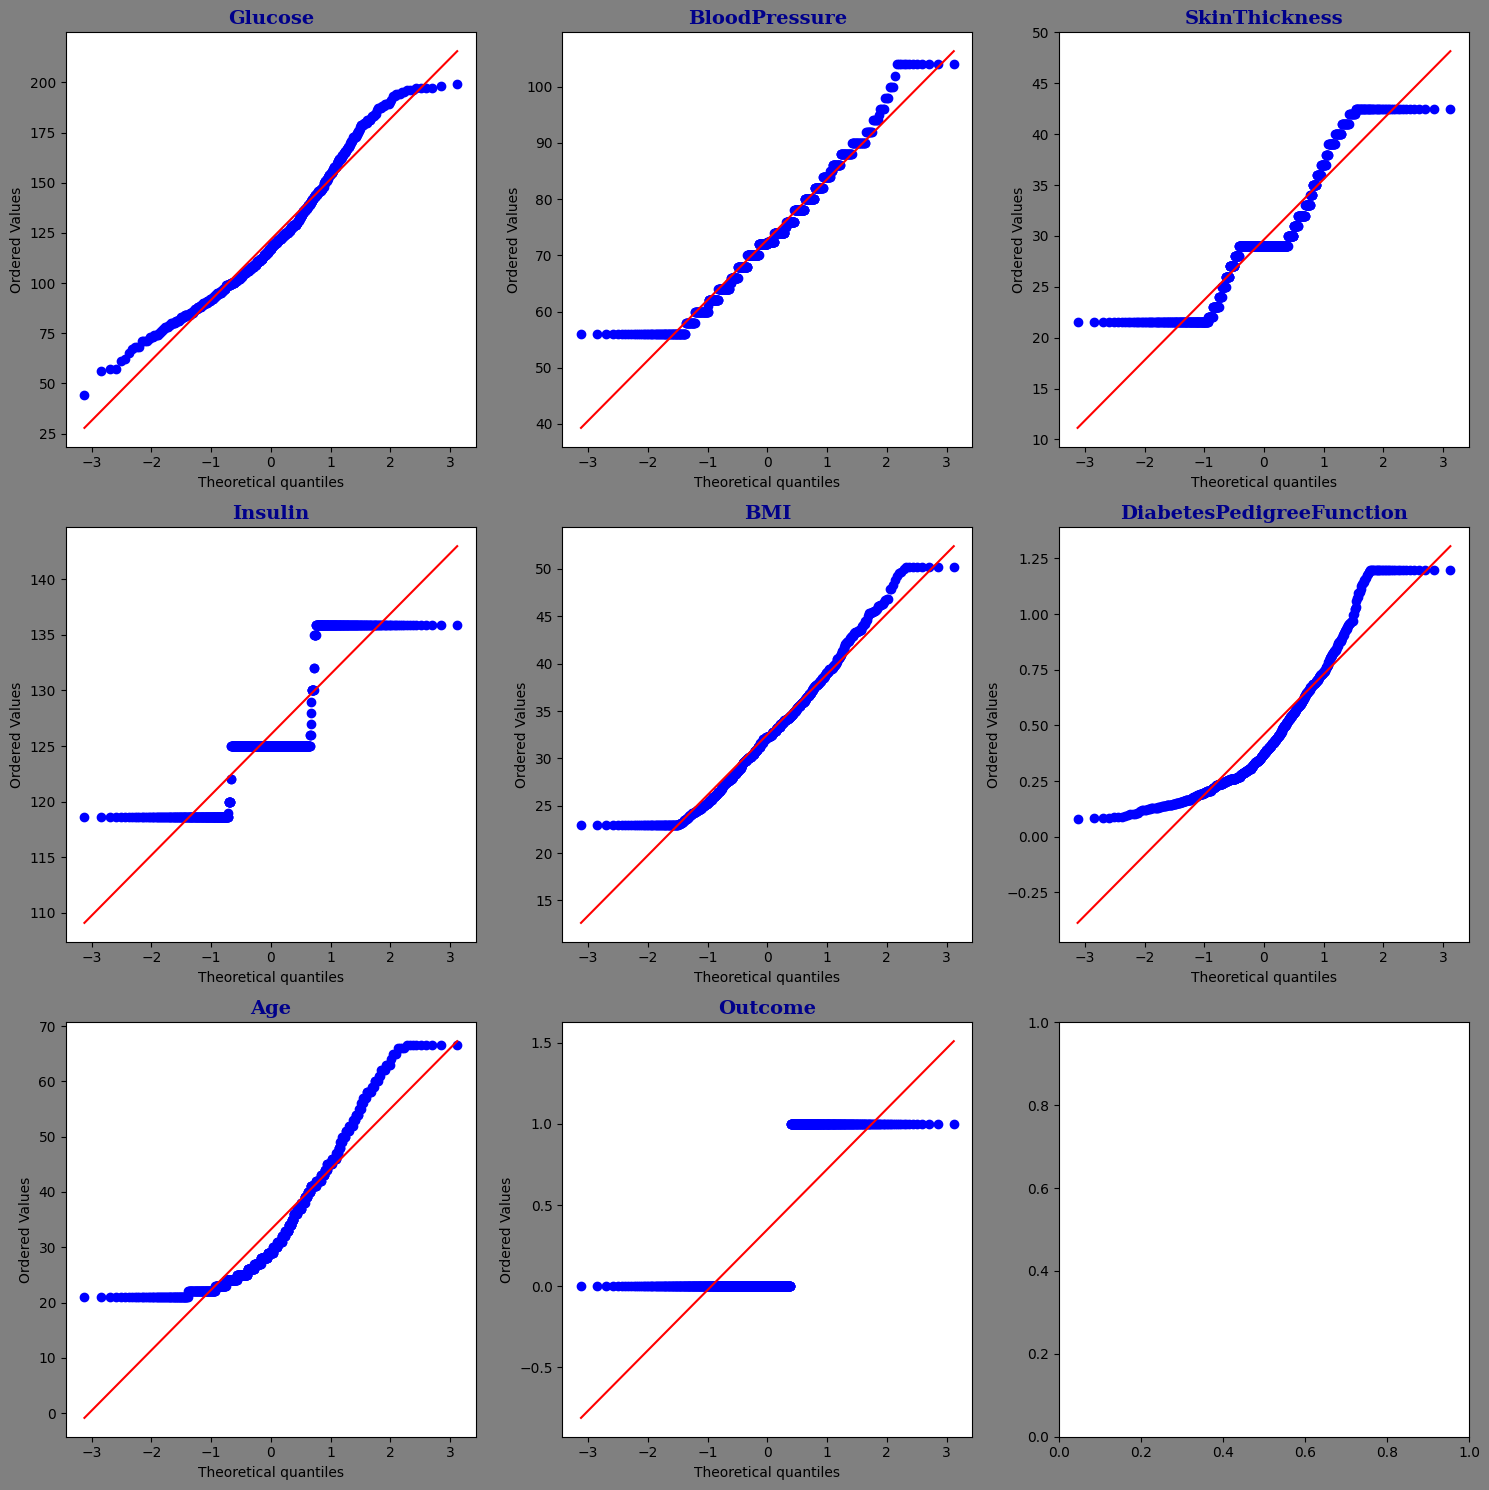

In [22]:
# Create a figure and axis for subplots
fig, axs = plt.subplots(num_rows, 3, facecolor='grey', figsize=(15, num_rows * 5))

# Flatten the axis array to handle both 1D and 2D cases
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each column in the DataFrame
for i, column in enumerate(df.columns):
    # Select the current axis for plotting
    ax = axs[i]
    
    # Generate Q-Q plot for the current column
    stats.probplot(df[column], plot=ax)
    
    # Set title for the plot (using column name)
    ax.set_title(column,fontdict=title_font)
    
# Adjust layout and display the plot
plt.tight_layout()
plt.show();

In [23]:
for i in df.columns[0:-1]:
    skewness = round(df[i].skew(), 2)
    kurtosis = round(df[i].kurtosis(), 2)
    print(f'{i:<25}:- Skewness = {skewness:<10}  Kurtosis = {kurtosis}')

Glucose                  :- Skewness = 0.53        Kurtosis = -0.26
BloodPressure            :- Skewness = 0.47        Kurtosis = -0.07
SkinThickness            :- Skewness = 0.56        Kurtosis = -0.43
Insulin                  :- Skewness = 0.54        Kurtosis = -0.86
BMI                      :- Skewness = 0.49        Kurtosis = -0.24
DiabetesPedigreeFunction :- Skewness = 1.02        Kurtosis = 0.3
Age                      :- Skewness = 1.07        Kurtosis = 0.33


### **Separating Input Features and Target Variable**

In [24]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

## Separating Training and Test data

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=13)

In [26]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,125.000,33.6,0.627,50.0
1,85.0,66.0,29.0,125.000,26.6,0.351,31.0
2,183.0,64.0,29.0,125.000,23.3,0.672,32.0
3,89.0,66.0,23.0,118.625,28.1,0.167,21.0
4,137.0,56.0,35.0,135.875,43.1,1.200,33.0


In [27]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Applying StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **1)   Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [32]:
Y_pred1 = lr.predict(X_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
scores = {}

In [34]:
scores['Logistic Regression'] = accuracy_score(Y_test,Y_pred1)

print("Accuracy of Logistic Regression:",accuracy_score(Y_test,Y_pred1))

Accuracy of Logistic Regression: 0.7597402597402597


***i.e. Accuracy of Logistic Regression model for classification is 75.97%***

In [35]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



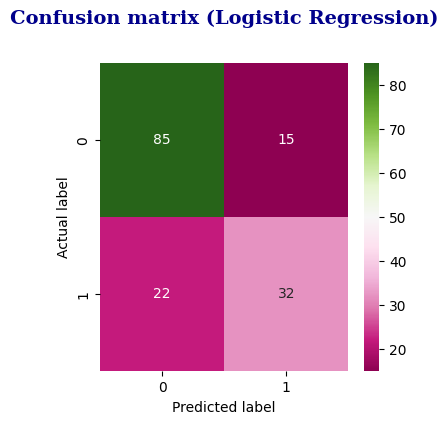

In [36]:
plt.figure(figsize=(4,4))
cnf_matrix_lr = metrics.confusion_matrix(Y_test,Y_pred1)
p = sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="PiYG" ,fmt="g")
plt.title('Confusion matrix (Logistic Regression)', fontdict=title_font, y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [37]:
Y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

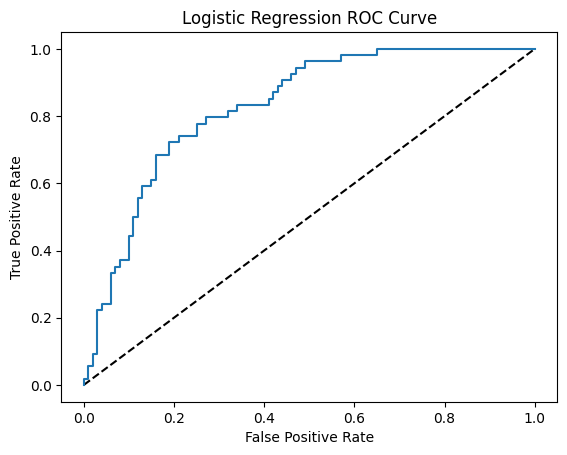

In [38]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [39]:
roc = {}
roc['Logistic Regression'] = roc_auc_score(Y_test, Y_pred_prob)

print("ROC AUC Score of Logistic Regression:",roc_auc_score(Y_test, Y_pred_prob))

ROC AUC Score of Logistic Regression: 0.8285185185185184


# **2)   k-Nearest Neighbors**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)

In [41]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [42]:
Y_pred2 = knn.predict(X_test)

In [43]:
scores['kNN'] = accuracy_score(Y_test,Y_pred2)

print("Accuracy of kNN: ",accuracy_score(Y_test,Y_pred2))

Accuracy of kNN:  0.7662337662337663


***i.e. Accuracy of kNN model for classification is 76.62%***

In [44]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



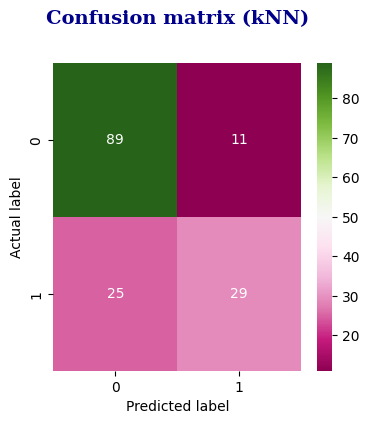

In [45]:
plt.figure(figsize=(4,4))
cnf_matrix = metrics.confusion_matrix(Y_test,Y_pred2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt="g")
plt.title('Confusion matrix (kNN)', y=1.1, fontdict=title_font)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [46]:
Y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

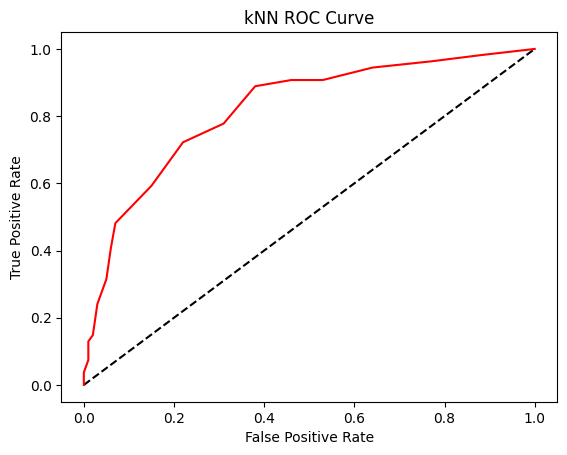

In [47]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='kNN',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN ROC Curve')
plt.show();

In [48]:
roc['kNN'] = roc_auc_score(Y_test, Y_pred_prob)

print("ROC AUC Score of kNN :",roc_auc_score(Y_test, Y_pred_prob))

ROC AUC Score of kNN : 0.8193518518518519


# **3)   Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [50]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [51]:
Y_pred3 = dt.predict(X_test)

In [52]:
scores['Decision Tree'] = accuracy_score(Y_test,Y_pred3)

print("Accuracy of Decision Tree: ",accuracy_score(Y_test,Y_pred3))

Accuracy of Decision Tree:  0.7532467532467533


***i.e. Accuracy of Decision Tree model for classification is 75.32%***

In [53]:
print(classification_report(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.64      0.67      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.75      0.75       154



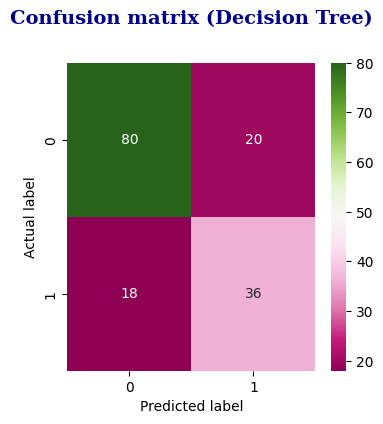

In [54]:
plt.figure(figsize=(4,4))
cnf_matrix = metrics.confusion_matrix(Y_test,Y_pred3)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt="g")
plt.title('Confusion matrix (Decision Tree)', y=1.1, fontdict=title_font)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [55]:
Y_pred_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

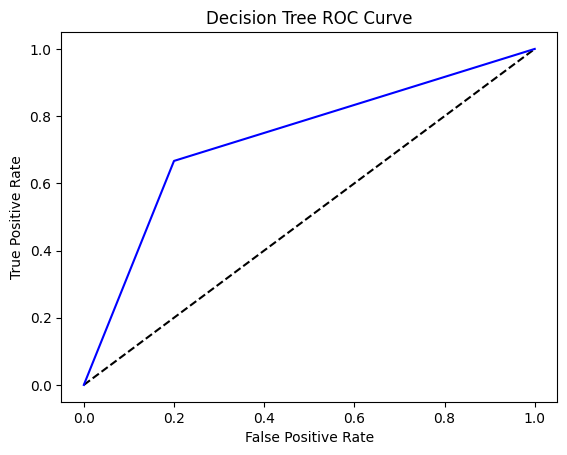

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree',color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

In [57]:
roc['Decision Tree'] = roc_auc_score(Y_test, Y_pred_prob)

print("ROC AUC Score of Decision Tree :",roc_auc_score(Y_test, Y_pred_prob))

ROC AUC Score of Decision Tree : 0.7333333333333333


# **4)   Naive Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [59]:
nb.fit(X_train,Y_train)

GaussianNB()

In [60]:
Y_pred4 = nb.predict(X_test)

In [61]:
scores['Naive Bayes'] = accuracy_score(Y_test,Y_pred4)

print("Accuracy of Naive Bayes: ",accuracy_score(Y_test,Y_pred4))

Accuracy of Naive Bayes:  0.7727272727272727


***i.e. Accuracy of Gaussian Naive Bayes model for classification is 77.27%***

In [62]:
print(classification_report(Y_test,Y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       100
           1       0.68      0.67      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



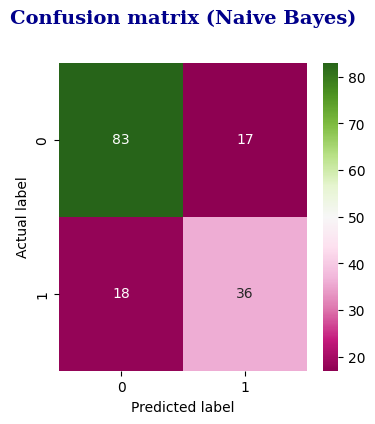

In [63]:
plt.figure(figsize=(4,4))
cnf_matrix = metrics.confusion_matrix(Y_test,Y_pred4)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PiYG" ,fmt="g")
plt.title('Confusion matrix (Naive Bayes)', y=1.1, fontdict=title_font)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [64]:
Y_pred_prob = nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

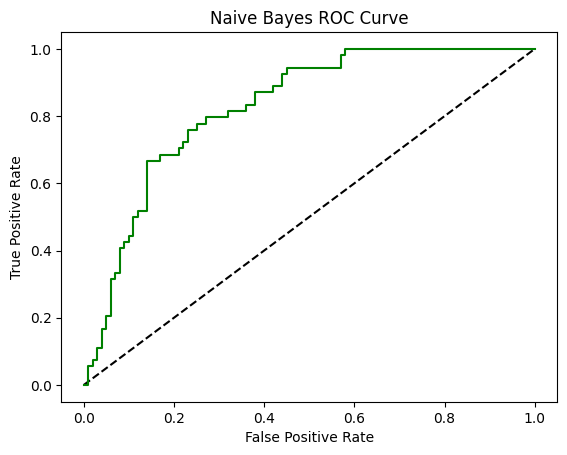

In [65]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes',color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.show();

In [66]:
roc['Naive Bayes'] = roc_auc_score(Y_test, Y_pred_prob)

print("ROC AUC Score of Naive Bayes :",roc_auc_score(Y_test, Y_pred_prob))

ROC AUC Score of Naive Bayes : 0.8272222222222223


# **5)   Support Vector Machine**

In [67]:
from sklearn.svm import SVC
sv = SVC(gamma=0.01)

In [68]:
sv.fit(X_train,Y_train)

SVC(gamma=0.01)

In [69]:
Y_pred5 = sv.predict(X_test)

In [70]:
scores['SVM'] = accuracy_score(Y_test,Y_pred5)

print("Accuracy of Support Vector Machine: ",accuracy_score(Y_test,Y_pred5))

Accuracy of Support Vector Machine:  0.7532467532467533


***i.e. Accuracy of Support Vector Machine model for classification is 75.32%***

In [71]:
print(classification_report(Y_test,Y_pred5))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



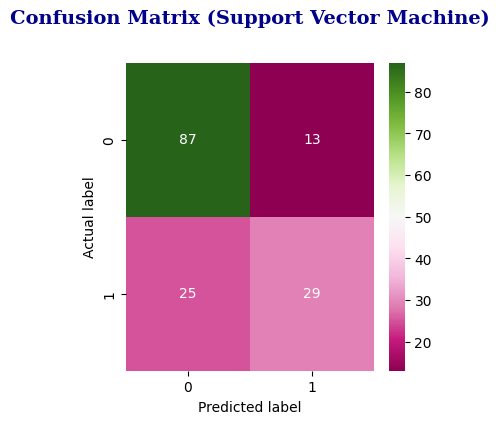

In [72]:
plt.figure(figsize=(4,4))
cnf_matrix_svm = metrics.confusion_matrix(Y_test,Y_pred5)
p = sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="PiYG" ,fmt="g")
plt.title('Confusion Matrix (Support Vector Machine)', y=1.1, fontdict=title_font)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show();

In [73]:
Y_pred_decision = sv.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_decision)

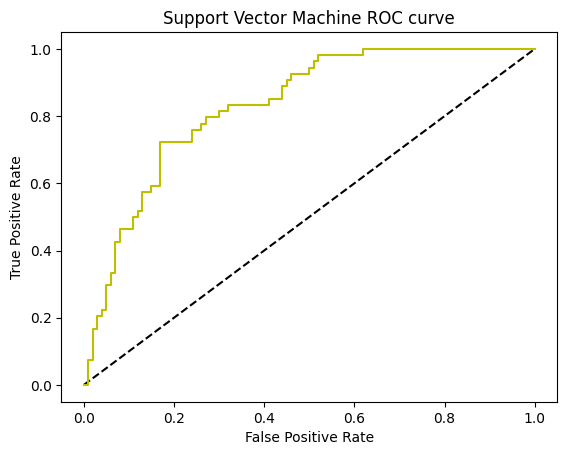

In [74]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM',color='y')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC curve')
plt.show()

In [75]:
roc['SVM'] = roc_auc_score(Y_test, Y_pred_decision)

print("ROC AUC Score of Support Vector Machine :",roc_auc_score(Y_test, Y_pred_decision))

ROC AUC Score of Support Vector Machine : 0.8311111111111111


# ***Result***

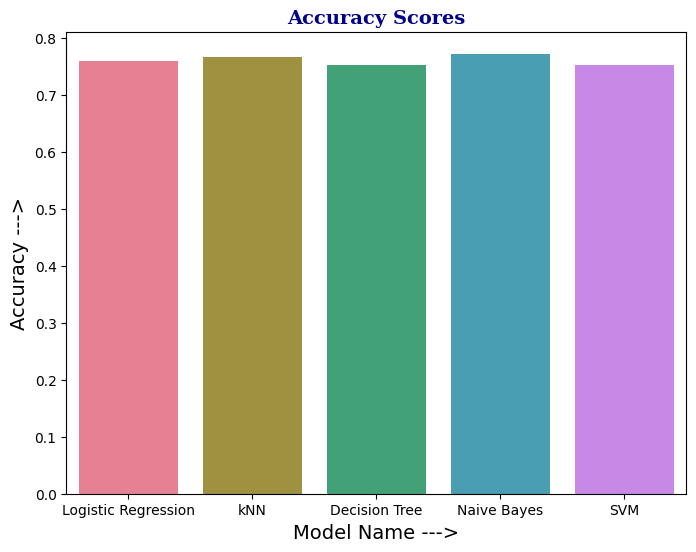

In [78]:
# Define colors for each bar
colors = sns.color_palette("husl", len(scores))

plt.figure(figsize=(8,6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)
plt.xticks(rotation=0)
plt.xlabel("Model Name --->", fontsize=14)
plt.ylabel("Accuracy --->", fontsize=14)
plt.title("Accuracy Scores", fontdict=title_font)
plt.show();

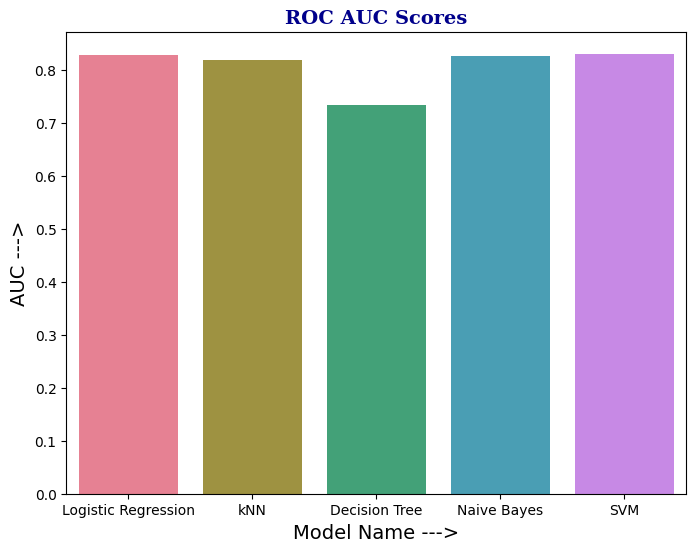

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(roc.keys()), y=list(roc.values()), palette=colors)
plt.xticks(rotation=0)
plt.xlabel("Model Name --->",fontsize=14)
plt.ylabel("AUC --->",fontsize=14)
plt.title("ROC AUC Scores",fontdict=title_font);

***Among the classification models evaluated, the Gaussian Naive Bayes and SVM Classifier exhibits slightly better performance relative to the other classification models.***